In [2]:
"""
Description: Inspection and visualization of the 'heart_rate.csv' file.
File source: downloaded from link in ./../project_description.txt

App Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html

Notes:

"""

"\nDescription: Inspection and visualization of the 'heart_rate.csv' file.\nFile source: downloaded from link in ./../project_description.txt\n\nApp Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html\n\nNotes:\n\n"

In [7]:
#General imports 
import sys
import os
from datetime import datetime, timedelta, date
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
from retrieve_time import Retrieve_Timestamps
%matplotlib inline

In [4]:
#Set matplotlib variables for prettier plots.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
fs = 36.

In [5]:
#Initialize relevant variables
M = {}
time_format = '%Y-%m-%d %H:%M:%S.%f'

## Collect the data

In [6]:
#Read the sleep data.
fpath = './../data/heart_rate.csv'
data = pd.read_csv(fpath, header=0, index_col=0, low_memory=False)
print(data.head(n=5))

                  end_time  heart_rate binning_data               start_time  \
0  2017-12-16 04:30:29.450        60.0          NaN  2017-12-16 04:30:29.450   
1  2017-12-16 05:50:29.380        56.0          NaN  2017-12-16 05:50:29.380   
2  2017-12-30 02:08:16.211        55.0          NaN  2017-12-30 02:08:16.211   
3  2018-01-15 14:47:37.175        62.0          NaN  2018-01-15 14:47:37.175   
4  2017-12-16 02:20:29.470        47.0          NaN  2017-12-16 02:20:29.470   

   heart_beat_count              update_time  max  min  \
0                 1  2017-12-16 04:35:00.341  0.0  0.0   
1                 1  2017-12-16 05:55:00.264  0.0  0.0   
2                 1  2017-12-30 02:08:16.411  0.0  0.0   
3                 1  2018-01-15 14:47:37.371  0.0  0.0   
4                 1  2017-12-16 02:35:00.252  0.0  0.0   

                      pkg_name time_offset  \
0  com.sec.android.app.shealth    UTC-0400   
1  com.sec.android.app.shealth    UTC-0400   
2  com.sec.android.app.shealth  

## Pre-process the data

In [9]:
#Sort dictionary based on the 'start_time' column.
#Create datetime objects and collect the bedtime hours.
starttime_obj = Retrieve_Timestamps(data['start_time'].values, data['time_offset'].values, 'UTC', time_format).out
#print(starttime_obj)
#The two earliest dates seem spurious. Remove them.
data = data.drop(data[data.start_time == min(data.start_time)].index)

starttime_obj = Retrieve_Timestamps(data['start_time'].values, data['time_offset'].values, 'UTC', time_format).out
endtime_obj = Retrieve_Timestamps(data['end_time'].values, data['time_offset'].values, 'UTC', time_format).out

print('Start date: ', (min(starttime_obj)))
print('End date: ', (max(starttime_obj)))

M['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])

1513398629.45
Start date:  2016-06-10 09:35:33.590000+05:30
End date:  2018-04-25 14:46:13.476000-03:00


In [9]:
#Compute time progression variable and sort dataframe according to it.
ref_date = min(starttime_obj)
time_prog = starttime_obj - ref_date
data['time_prog'] = np.array([t.days + t.seconds/86400. for t in time_prog]) #In days
data['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])

data.sort_values(by ='time_prog', inplace=True)

#Compute time duration.
#duration = endtime_obj_corr - starttime_obj_corr
#M['duration'] = np.array([t.days*24.*60 + t.seconds/60. for t in duration]) #In minutes

#M['heart_beat_count'] = data['heart_beat_count'].values

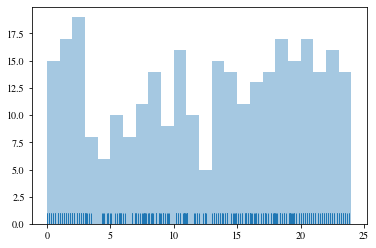

In [10]:
sns.distplot(data['start_hour'].values, bins=np.arange(0,24.1,1), kde=False, rug=True)

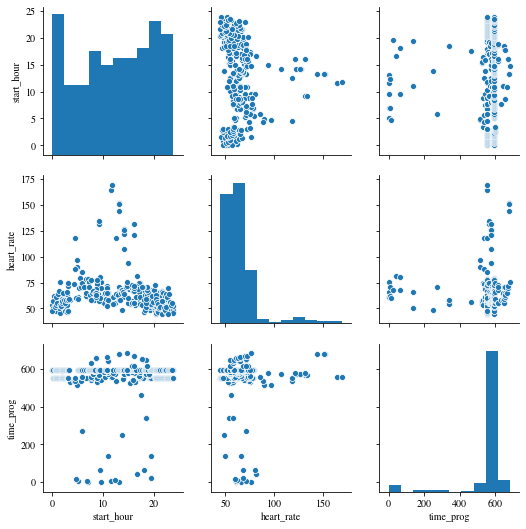

In [11]:
pair_cols = ['start_hour', 'heart_rate', 'time_prog']
df2 = data[pair_cols]
g = sns.pairplot(df2)